# Text Analysis in Python 2: Word Counts / Words Count

<h1 style="text-align:center;font-size:300%;">The United States is / are ____?</h1> 
  <img src="https://miro.medium.com/max/720/1*pp7HX01jBv2wbVRW9Ml_mA.png" style="width:%80;">
  <!--<img src="http://www.languagetrainers.com/blog/wp-content/uploads/2012/10/us-are-vs-us-is1.png" style="width:%140;">-->

From Benjamin Schmidt and Mitch Fraas, ["The Language of the State of the Union](https://www.theatlantic.com/politics/archive/2015/01/the-language-of-the-state-of-the-union/384575/)," *The Atlantic* (Jan. 15, 2015).  **Can we create our own version of this graph?**

## This Lesson

**Exploring the frequency of words and phrases in texts: what can they tell us about a text?**

In this session, participants will:
+ Apply Python (and the NLTK package) to read individual text files and apply essential pre-processing techniques (i.e. divide each text into a list of words or tokens, lower-case all words, remove punctuation, and lemmatize each word).
+ Create frequency lists identifying the most common words or ngrams (multi-word terms) in a text or corpus
+ Create graphs, charts, and word clouds visually representing word and term frequency patterns 
+ Identify some ways the language of State of the Union speeches has changed over time and discuss how this method could be applied to other texts and questions

**In short, one of our goals today is to recreate the graphic above (from *The Atlantic*) showing changes in the frequency of particular words or terms - as used in the State of the Union address - over time.** 


## Structure of Notebooks

These Jupyter Notebooks are designed to integrate instructions and explanations (in the white "markdown" cells below) with hands-on practice with the code (in the gray "code" cells below). To add, modify, or delete cells, please use the Menu above (especially under the Edit, Insert, and Cell tabs) or click ESC + H to see a list of keyboard shortcuts.

<div class="alert alert-success" role="alert"><h3 style="color:green">Code Together:</h3><p style="color:green">In these cell blocks, we will code together. You can find the completed version in our shared folder (ending with "_completed.ipynb").</p></div>

<div class="alert alert-info" role="alert"><h3 style="color:blue;">Exercises:</h3><p style="color:blue">are in blue text. These are a chance to practice what you have learned.</p></div>

<div style = "background-color:#f3e5f5"><h3 style="color:purple">Python Basics - Additional Practice</h3><p style="color:purple">are in purple text. Work on these after the lesson if you would like more practice.</p></div>

## Lists of Words, Frequency Lists, N-Grams, and Dispersion Plots

*[intro / explanation / beg instructions / links back to prev notebooks]*

## Part I: Getting Started - Importing Python Packages, SOTU texts, and tokenizing

**1. First, we will need to import the necessary Python packages or libraries for today's lesson.**

In [1]:
import os, nltk, re, collections, pathlib, time
import pandas as pd
import matplotlib as plt
import seaborn as sns
from pathlib import Path
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk import ngrams, pos_tag, word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download("punkt")
from collections import Counter

plt.rcParams['figure.figsize'] = [12, 6]  #changes default figure size to make larger plots

%config InteractiveShellApp.matplotlib = 'inline'
#%config InlineBackend.figure_formats = ['svg']               #this command prints out images as svgs rather pngs. However, it also slows down the plotting
                                                              ## so uncomment if you want Jupyter to render clearer images

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\F0040RP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**2. Navigate to and examine the folder that has your SOTU files.** As in the previous lesson, we use the **pathlib** library and its functions to work with paths to files and folders (directories). For more on the challenges of working with filepaths across operating systems and how pathlib addresses see ["Python 3's pathlib module: Taming the File System."](https://realpython.com/python-pathlib/)

In [2]:
p = Path.cwd()
p2 = p.parent
sotudir = Path(p2,"strings-and-files","state-of-the-union-dataset","txt")  # creates a filepath to our dataset or corpus of texts
print(sotudir)
pathlist = sorted(sotudir.glob("*.txt"))    #glob("*.txt") retrieves only filepaths to .txt files; sotudir is the filepath we created above; sorted() sorts the filepaths in ascending order
pathlist[:10]

c:\Users\F0040RP\Documents\DartLib_RDS\textAnalysis\strings-and-files\state-of-the-union-dataset\txt


[WindowsPath('c:/Users/F0040RP/Documents/DartLib_RDS/textAnalysis/strings-and-files/state-of-the-union-dataset/txt/1790_Washington.txt'),
 WindowsPath('c:/Users/F0040RP/Documents/DartLib_RDS/textAnalysis/strings-and-files/state-of-the-union-dataset/txt/1791_Washington.txt'),
 WindowsPath('c:/Users/F0040RP/Documents/DartLib_RDS/textAnalysis/strings-and-files/state-of-the-union-dataset/txt/1792_Washington.txt'),
 WindowsPath('c:/Users/F0040RP/Documents/DartLib_RDS/textAnalysis/strings-and-files/state-of-the-union-dataset/txt/1793_Washington.txt'),
 WindowsPath('c:/Users/F0040RP/Documents/DartLib_RDS/textAnalysis/strings-and-files/state-of-the-union-dataset/txt/1794_Washington.txt'),
 WindowsPath('c:/Users/F0040RP/Documents/DartLib_RDS/textAnalysis/strings-and-files/state-of-the-union-dataset/txt/1795_Washington.txt'),
 WindowsPath('c:/Users/F0040RP/Documents/DartLib_RDS/textAnalysis/strings-and-files/state-of-the-union-dataset/txt/1796_Washington.txt'),
 WindowsPath('c:/Users/F0040RP/Doc

**3. Open the George Washington's 1794 SOTU address:**

*Note*: In Python, it is recommended that you always close your files after finishing with them. One way to do this is to place an **open()** command within a **with statement**. This way, the files is closed as soon as we exit the indented block underneath the with statement. Another way is to immediately **close()** the file after extracting the information you need from it. Run either or both options below. See [Why Close Python Files](https://realpython.com/why-close-file-python/).  

In [3]:
with open(Path(sotudir,'1794_Washington.txt')) as f:
    wash94 = f.read()

In [4]:
f = open(Path(sotudir,'1794_Washington.txt'))
wash94 = f.read()
f.close()

<div class="alert alert-success" role="alert">
    <p style='color:green'><b>3b. Code Together:</b> Print the last (instead of the first) 400 characters of this address.</p>
</div>

In [5]:
#insert code here
#wash94[0:400]
wash94[-400:0]      #same as wash94[-400:] or wash94[-400:-1]

''

**4. Tokenize this address and count the number of tokens.**



We can then convert this SOTU text into a list of words or tokens.

There are many different ways we may want to create such a list, depending on our needs.

**4a. For example, we can just use NLTK's standard word tokenizer.**

In [6]:
#if we wanted all punctuation, including tokens we could just run the following code:
tokens = word_tokenize(wash94)  #this command uses the function word_tokenize() from the package ntlk (which we imported at the beginning of the lesson)
print("our tokens list contains",len(tokens),"tokens.")
print(tokens[:40])

our tokens list contains 3197 tokens.
['Fellow-Citizens', 'of', 'the', 'Senate', 'and', 'House', 'of', 'Representatives', ':', 'When', 'we', 'call', 'to', 'mind', 'the', 'gracious', 'indulgence', 'of', 'Heaven', 'by', 'which', 'the', 'American', 'people', 'became', 'a', 'nation', ';', 'when', 'we', 'survey', 'the', 'general', 'prosperity', 'of', 'our', 'country', ',', 'and', 'look']


**4b. Or we can remove punctuation by using NLTK's Regexptokenizer.**

In [7]:
tokenizer = RegexpTokenizer(r'\w+')
tokens2=tokenizer.tokenize(wash94)
print("our tokens2 list - with punctuation removed - contains",len(tokens2),"tokens.")
print(tokens2[:40])


our tokens2 list - with punctuation removed - contains 2918 tokens.
['Fellow', 'Citizens', 'of', 'the', 'Senate', 'and', 'House', 'of', 'Representatives', 'When', 'we', 'call', 'to', 'mind', 'the', 'gracious', 'indulgence', 'of', 'Heaven', 'by', 'which', 'the', 'American', 'people', 'became', 'a', 'nation', 'when', 'we', 'survey', 'the', 'general', 'prosperity', 'of', 'our', 'country', 'and', 'look', 'forward', 'to']


**4c. We can convert all the tokens to lower-case.**

In [8]:
ltokens2 = [tok.lower() for tok in tokens2]
print("our tokens2 list converted to lower-case (saved as ltokens2) - contains",len(ltokens2),"tokens.")
print(ltokens2[:40])

our tokens2 list converted to lower-case (saved as ltokens2) - contains 2918 tokens.
['fellow', 'citizens', 'of', 'the', 'senate', 'and', 'house', 'of', 'representatives', 'when', 'we', 'call', 'to', 'mind', 'the', 'gracious', 'indulgence', 'of', 'heaven', 'by', 'which', 'the', 'american', 'people', 'became', 'a', 'nation', 'when', 'we', 'survey', 'the', 'general', 'prosperity', 'of', 'our', 'country', 'and', 'look', 'forward', 'to']


**4d. We often want to remove stopwords**. **Stop words** are common words that reveal little about the meaning of a text (such as articles like "the", conjunctions like "and", prepositions like "on", pronouns like "our", and helper verbs like "can"). Fortunately, NLTK provides a list of stop words in English (and other languages as well) that we can use to eliminate all such words from our texts.

Let's examine stopwords in English:

In [9]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

<div class="alert alert-success" role="alert">
    <p style="color:green"><b>Code Together</b>: What if you work with another language? Let's print out the language options for NLTK's stopwords:</p>
</div>

In [10]:
# languages in nltk
print(stopwords.fileids())

['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


<div class="alert alert-success" role="alert">
    <p style="color:green">Now try to print out stopwords from a language of your choice (using the same code we used above to print out English stopwords):</p>
</div>

In [11]:
print(stopwords.words('spanish'))



['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

Next, with our English stopwords list, we can further modify our ltokens2 list by removing stopwords:

In [12]:
stop = stopwords.words('english')
stop = sorted(stop)
ltokens2ns = [tok for tok in ltokens2 if tok not in stop]        #list comprehension removes all stopwords from ltokens2

print("We had",len(ltokens2),"tokens in our ltoken2 list.")
print("beginning with:",ltokens2[:30]," \n")
print("After removing stop words, we now have",len(ltokens2ns),"tokens in our list.")
print("beginning with:",ltokens2ns[:30])

We had 2918 tokens in our ltoken2 list.
beginning with: ['fellow', 'citizens', 'of', 'the', 'senate', 'and', 'house', 'of', 'representatives', 'when', 'we', 'call', 'to', 'mind', 'the', 'gracious', 'indulgence', 'of', 'heaven', 'by', 'which', 'the', 'american', 'people', 'became', 'a', 'nation', 'when', 'we', 'survey']  

After removing stop words, we now have 1347 tokens in our list.
beginning with: ['fellow', 'citizens', 'senate', 'house', 'representatives', 'call', 'mind', 'gracious', 'indulgence', 'heaven', 'american', 'people', 'became', 'nation', 'survey', 'general', 'prosperity', 'country', 'look', 'forward', 'riches', 'power', 'happiness', 'seems', 'destined', 'deepest', 'regret', 'announce', 'recess', 'citizens']


<div class="alert alert-info" role="alert">
    <h3 style = "color:blue">Exercises (Part I)</h3>
    <p style = "color:blue"><b>5. Tokenize and lower-case another SOTU address.</b><p>
    <p style = "color:blue">We counted the number of tokens within Washington's 1794 address. Choose another SOTU address and compute and print out the number of words contained within it.</p>
</div>

In [13]:
with open(Path(sotudir,'1864_Lincoln.txt')) as f:
    linc64 = f.read()
tokenizer = RegexpTokenizer(r'\w+')
linctoks=tokenizer.tokenize(linc64)
print(linctoks[:50])

['Fellow', 'Citizens', 'of', 'the', 'Senate', 'and', 'House', 'of', 'Representatives', 'Again', 'the', 'blessings', 'of', 'health', 'and', 'abundant', 'harvests', 'claim', 'our', 'profoundest', 'gratitude', 'to', 'Almighty', 'God', 'The', 'condition', 'of', 'our', 'foreign', 'affairs', 'is', 'reasonably', 'satisfactory', 'Mexico', 'continues', 'to', 'be', 'a', 'theater', 'of', 'civil', 'war', 'While', 'our', 'political', 'relations', 'with', 'that', 'country', 'have']


<div style = "background-color:#f3e5f5">
    <br/>
    <h3 style = "color:#7b1fa2">Part II. Python Basics: For Loops vs. List Comprehensions</h3>
    <p style = "color:#7b1fa2">In step 4c, we converted our tokens to lower-case and saved them to a new list called "ltokens2" using the list comprehension:</p></div>
        
        ltokens2 = [tok.lower() for tok in tokens2]
        
<div style = "background-color:#f3e5f5">
    <p style = "color:#7b1fa2">This task could also be accomplised with a <b>for loop</b>.</p>  
    <p style = "color:#7b1fa2">6. <b>FOR LOOPS to iterate through lists</b>: In the previous lesson we converted all tokens to lowercase using a simple <b>for loop</b>.</p>
    <br/>
</div>

In [14]:
ltokens2 = []                      #assigns an empty list to the variable ltokens2
for tok in tokens2:                #iterates through our tokens2 list we created above, assigning the variable name "tok" to each item in the list as it goes
    ltokens2.append(tok.lower())   #lowercases each item ("tok") from tokens2 list and adds it to ltokens2 list (tokens2 is not permanently changed) using append function

In [15]:
print("tokens2 list: \n",tokens2[:40],"\n\n")
print("ltokens2 list: \n",ltokens2[:40])

tokens2 list: 
 ['Fellow', 'Citizens', 'of', 'the', 'Senate', 'and', 'House', 'of', 'Representatives', 'When', 'we', 'call', 'to', 'mind', 'the', 'gracious', 'indulgence', 'of', 'Heaven', 'by', 'which', 'the', 'American', 'people', 'became', 'a', 'nation', 'when', 'we', 'survey', 'the', 'general', 'prosperity', 'of', 'our', 'country', 'and', 'look', 'forward', 'to'] 


ltokens2 list: 
 ['fellow', 'citizens', 'of', 'the', 'senate', 'and', 'house', 'of', 'representatives', 'when', 'we', 'call', 'to', 'mind', 'the', 'gracious', 'indulgence', 'of', 'heaven', 'by', 'which', 'the', 'american', 'people', 'became', 'a', 'nation', 'when', 'we', 'survey', 'the', 'general', 'prosperity', 'of', 'our', 'country', 'and', 'look', 'forward', 'to']


<div style = "background-color:#f3e5f5; color:purple">
    <br/>
    <p>7. <b>LIST COMPREHENSIONS</b>: We can also use <b>list comprehensions</b> to iterate through lists more efficiently and with fewer lines of code.</p> 
    <p>We can do the same thing using a <b>list comprehension</b>. The formula for list comprehensions is:</p>
        
        newList = [item (or modified item) for item in oldList]
    
</div>


<div style = "background-color:#f3e5f5; color:purple">
    <br/>
<p>You can also add a conditional:</p>
    
        newList = [item or (modified item) for item in oldList if item meets condition]
</div>

<div style = "background-color:#f3e5f5; color:purple">
    <br/>    
    <p>For more on list comprehensions see: <a href="https://www.w3schools.com/python/python_lists_comprehension.asp">w3schools</a> or <a href="https://realpython.com/list-comprehension-python/">realpython</a>.</p>
    <p style = "color:purple">To create a new list of tokens that have been converted to lower case, we can create the following list comprehension</p>
    <br/>
</div>

In [16]:
ltokens2 = [tok.lower() for tok in tokens2]              #in plain English, this looks at each item (which we assign the variable "tok" here) in our list of tokens and
                                                             ## lowercases it (with "tok.lower()") and then places this lower case version in a list (indicates by the "[]")
                                                             ## which we call ltokens2.  Note: the only variable previously defined here is tokens2
print("ltokens2 list created using a list comprehension: \n",ltokens2[:40])

ltokens2 list created using a list comprehension: 
 ['fellow', 'citizens', 'of', 'the', 'senate', 'and', 'house', 'of', 'representatives', 'when', 'we', 'call', 'to', 'mind', 'the', 'gracious', 'indulgence', 'of', 'heaven', 'by', 'which', 'the', 'american', 'people', 'became', 'a', 'nation', 'when', 'we', 'survey', 'the', 'general', 'prosperity', 'of', 'our', 'country', 'and', 'look', 'forward', 'to']


<div style = "background-color:#f3e5f5">
    <p style = "color:purple"><b>7b. Run the code below. What did it do?</b></p> 
</div>

In [17]:
#here is an example of a list comprehension with a conditional. 

utokensT = [tok.upper() for tok in tokens2 if tok.startswith("T")]
print(utokensT)

['THE', 'THE', 'THEY', 'THEY', 'THEY', 'THUS', 'THIRTY', 'THE', 'THE', 'TO', 'THE', 'THE', 'TOWARD', 'THE', 'THE', 'THE', 'THERE']


## Part III. Creating Frequency Lists

**8. Counting Unique Items in a List:** As with most tasks in Python or other popular programming languages, there are multiple ways to count unique items in a list and create frequency items of them. First, we will use the **collections** package.

In [18]:
numsList = [3,2,2]                         #INSERT ADDITIONAL NUMBERS IN THIS LIST, include repeats       
collections.Counter(numsList)   #using the function "Counter" from the package "collections" - creates a 
                                                  ## frequency list from numslist


Counter({3: 1, 2: 2})

**9. Counting Unique Tokens:** Let's apply the same method to create a frequency list of our tokens from out list of lowercase tokens (ltokens2)

In [19]:
tokfreqs = collections.Counter(ltokens2)

**9b. To view the most or least common tokens in our list, run:**

In [20]:
print(tokfreqs.most_common(40))
print("\n")
print(tokfreqs.most_common()[:-40:-1]) #there is no function for returning the least common tokens
     #however, we can essentially do the same thing with the above code 
    # by taking the tokens found at the end of the ordered list of most common tokens (the extra ":" before -60
    # returns the end of this list in reverse)

[('the', 273), ('of', 187), ('to', 138), ('and', 86), ('a', 48), ('that', 39), ('by', 36), ('be', 36), ('in', 36), ('which', 34), ('not', 32), ('have', 30), ('been', 24), ('our', 22), ('it', 22), ('were', 20), ('states', 19), ('as', 19), ('from', 19), ('i', 18), ('an', 18), ('with', 17), ('was', 17), ('their', 17), ('united', 15), ('this', 15), ('government', 14), ('for', 14), ('will', 14), ('them', 13), ('has', 13), ('is', 12), ('they', 12), ('or', 12), ('on', 12), ('laws', 12), ('may', 12), ('who', 11), ('my', 11), ('would', 10)]


[('go', 1), ('safeguard', 1), ('anticipations', 1), ('verify', 1), ('conferred', 1), ('goodness', 1), ('perpetuate', 1), ('flight', 1), ('invasion', 1), ('sedition', 1), ('internal', 1), ('out', 1), ('root', 1), ('times', 1), ('enable', 1), ('confirming', 1), ('wicked', 1), ('machinations', 1), ('turn', 1), ('protection', 1), ('holy', 1), ('spread', 1), ('ruler', 1), ('imploring', 1), ('ourselves', 1), ('insist', 1), ('acquiring', 1), ('lose', 1), ('right'

**9c. FREQUENCY LIST WITH STOP WORDS REMOVED**: The list of most common words above does not seem to be very revealing. Let's try to remove stopwords to see how that changes the results.

In [21]:
n=40
tokfreqs_ns=collections.Counter(ltokens2ns)
print("\nNow our most common",n,"tokens (after removing stop words) are:\n",tokfreqs_ns.most_common(n))


Now our most common 40 tokens (after removing stop words) are:
 [('states', 19), ('united', 15), ('government', 14), ('laws', 12), ('may', 12), ('would', 10), ('militia', 10), ('citizens', 9), ('constitution', 8), ('pennsylvania', 8), ('upon', 8), ('men', 7), ('congress', 7), ('every', 7), ('general', 6), ('power', 5), ('insurrection', 5), ('therefore', 5), ('let', 5), ('house', 4), ('however', 4), ('session', 4), ('counties', 4), ('justice', 4), ('might', 4), ('inspector', 4), ('time', 4), ('force', 4), ('without', 4), ('shall', 4), ('must', 4), ('thus', 4), ('army', 4), ('ought', 4), ('whether', 4), ('public', 4), ('fellow', 3), ('representatives', 3), ('nation', 3), ('prosperity', 3)]


<div class="alert alert-info" role="alert"><h3 style='color:blue'>Exercises (Parts I - III)</h3></div>

<div class="alert alert-info" role="alert"><p style='color:blue'>10. Open and read in a different SOTU address of your choice. Tokenize it using the tokenizer we used to remove all punctuation.</p></div>

In [22]:
with open(Path(sotudir,'1946_Truman.txt')) as f:
    truman46 = f.read()
tokenizer = RegexpTokenizer(r'\w+')
trumantoks = tokenizer.tokenize(truman46)
#print(trumantoks[:50])
print(len(trumantoks))
print(trumantoks[:100])

28099
['To', 'the', 'Congress', 'of', 'the', 'United', 'States', 'A', 'quarter', 'century', 'ago', 'the', 'Congress', 'decided', 'that', 'it', 'could', 'no', 'longer', 'consider', 'the', 'financial', 'programs', 'of', 'the', 'various', 'departments', 'on', 'a', 'piecemeal', 'basis', 'Instead', 'it', 'has', 'called', 'on', 'the', 'President', 'to', 'present', 'a', 'comprehensive', 'Executive', 'Budget', 'The', 'Congress', 'has', 'shown', 'its', 'satisfaction', 'with', 'that', 'method', 'by', 'extending', 'the', 'budget', 'system', 'and', 'tightening', 'its', 'controls', 'The', 'bigger', 'and', 'more', 'complex', 'the', 'Federal', 'Program', 'the', 'more', 'necessary', 'it', 'is', 'for', 'the', 'Chief', 'Executive', 'to', 'submit', 'a', 'single', 'budget', 'for', 'action', 'by', 'the', 'Congress', 'At', 'the', 'same', 'time', 'it', 'is', 'clear', 'that', 'the', 'budgetary', 'program']


<div class="alert alert-info" role="alert"><p style='color:blue'>11. Now convert all remaining tokens into lower case and remove all stopwords. How many tokens are now found in your token list?</p></div>

In [23]:
trumantoks_lwr_nostops = [tok.lower() for tok in trumantoks if tok.lower() not in stop]   #could also write this in 2 lines of code:
#trumantoks_lwr = [tok.lower() for tok in trumantoks]
#trumantoks_lwr_nostops = [ltok for ltok in trumantoks_lwr if ltok not in stop]
print(len(trumantoks_lwr_nostops))
print(trumantoks_lwr_nostops[:100])


15486
['congress', 'united', 'states', 'quarter', 'century', 'ago', 'congress', 'decided', 'could', 'longer', 'consider', 'financial', 'programs', 'various', 'departments', 'piecemeal', 'basis', 'instead', 'called', 'president', 'present', 'comprehensive', 'executive', 'budget', 'congress', 'shown', 'satisfaction', 'method', 'extending', 'budget', 'system', 'tightening', 'controls', 'bigger', 'complex', 'federal', 'program', 'necessary', 'chief', 'executive', 'submit', 'single', 'budget', 'action', 'congress', 'time', 'clear', 'budgetary', 'program', 'general', 'program', 'government', 'actually', 'inseparable', 'president', 'bears', 'responsibility', 'recommending', 'congress', 'comprehensive', 'set', 'proposals', 'government', 'activities', 'financing', 'formulating', 'policies', 'preparing', 'budgetary', 'estimates', 'nation', 'congress', 'right', 'expect', 'president', 'adjust', 'coordinate', 'views', 'various', 'departments', 'agencies', 'form', 'unified', 'program', 'program', 'r

<div class="alert alert-info" role="alert"><p style='color:blue'>12. Create a frequency list of the top 30 words in your new list of tokens (lowercase with all punctuation tokens and stopwords removed). Compare the frequency list to the list we created for Washington's 1794 address. In what ways do they appear most different? Similar?</p></div>

In [24]:
n = 40
truman_tokfreqs = collections.Counter(trumantoks_lwr_nostops)
#print(tokfreqs)
print(f"most common {n} words in Truman's 1946 address:")   #this works the same as: print("most common %s words in Truman's 1946 address:"%n)
print(truman_tokfreqs.most_common(n))
print("\n***compared to Washington's 1794 address:\n")
print(tokfreqs_ns.most_common(n))


most common 40 words in Truman's 1946 address:
[('dollars', 207), ('war', 201), ('year', 187), ('million', 138), ('government', 135), ('fiscal', 129), ('expenditures', 120), ('program', 96), ('united', 92), ('1947', 87), ('billion', 85), ('federal', 78), ('congress', 74), ('must', 73), ('states', 72), ('legislation', 64), ('national', 60), ('1945', 58), ('world', 55), ('estimated', 55), ('business', 54), ('public', 54), ('economic', 53), ('production', 52), ('total', 52), ('time', 50), ('1946', 49), ('people', 49), ('1', 48), ('would', 46), ('new', 45), ('budget', 44), ('recommended', 44), ('also', 44), ('full', 43), ('employment', 43), ('nations', 43), ('increase', 43), ('years', 42), ('made', 40)]

***compared to Washington's 1794 address:

[('states', 19), ('united', 15), ('government', 14), ('laws', 12), ('may', 12), ('would', 10), ('militia', 10), ('citizens', 9), ('constitution', 8), ('pennsylvania', 8), ('upon', 8), ('men', 7), ('congress', 7), ('every', 7), ('general', 6), ('po

## IV. Create a Dataframe of SOTU texts

**14. DATAFRAMES:** To enable easier analysis of the SOTU texts, we can store info about each in a **dataframe**. A dataframe in Python is a common data structure enabled with the **pandas** library. It is a two-dimensional data table that stores data in rows and columns. Run the code below, and then examine what each portion of the code does.

In [25]:
tokenizer = RegexpTokenizer(r'\w+')
#n=50

txtList=[]
pathlist = sorted(sotudir.glob('*.txt'))      # .glob only stores the pathlist temporarily (for some reason), so you need to call it again!2
for path in pathlist:
    fn=path.stem                       #stem returns the filename minus the ".txt" (file extension). 
    year,pres=fn.split("_")            # fn = "1794_Washington" becomes year = "1794" and pres = "Washington"
    with open(path,'r') as f:  
        sotu = f.read()                #opens each file and reads it in as "sotu"
    tokens=tokenizer.tokenize(sotu)    # tokenizes "sotu"
    numtoks = len(tokens)             # counts the number of tokens in "sotu"
    txtList.append([pres,year,numtoks,tokens,sotu])   #add this info for "sotu" to a running list for all sotu addresses

colnames=['pres','year','numtoks','tokens','fulltext']
sotudf=pd.DataFrame(txtList,columns=colnames)  #places our completed list of SOTU info in a dataframe
sotudf['ltoks'] = sotudf['tokens'].apply(lambda x: [tok.lower() for tok in x]) #creates a new column to store lower case tokens
sotudf.head(10)                  #prints out the first 10 rows of this dataframe (the default value for head() is 5 rows)

,pres,year,numtoks,tokens,fulltext,ltoks
0,Washington,1790,0,[],,[]
1,Washington,1791,2314,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house..."
2,Washington,1792,2104,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house..."
3,Washington,1793,1973,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house..."
4,Washington,1794,2918,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house..."
5,Washington,1795,1988,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house..."
6,Washington,1796,2878,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house..."
7,Adams,1797,2060,"[Gentlemen, of, the, Senate, and, Gentlemen, o...",Gentlemen of the Senate and Gentlemen of the H...,"[gentlemen, of, the, senate, and, gentlemen, o..."
8,Adams,1798,2218,"[Gentlemen, of, the, Senate, and, Gentlemen, o...",Gentlemen of the Senate and Gentlemen of the H...,"[gentlemen, of, the, senate, and, gentlemen, o..."
9,Adams,1799,1505,"[Gentlemen, of, the, Senate, and, Gentlemen, o...",Gentlemen of the Senate and Gentlemen of the H...,"[gentlemen, of, the, senate, and, gentlemen, o..."


**15. SAVING DATAFRAMES:** It would be useful to reuse this dataframe in the future. Let's save it to a csv file. 

In [26]:
sotudf.to_csv("sotudf.tsv",encoding = "utf-8",sep="\t")
#we are saving this with a "tsv" extension to indicate we are using tabs ("\t") as our delimiter between columns, not commas
#csv = comma separated values; tsv = tab separated values
#within JupyterHub you should see this new file appear on the folder directory to the left. 
#you are welcome to download it (right click--> Download on PCS; Ctrl-Click --> Download on Macs)
# you can then open it in Excel by 1. opening a new, blank Excel workbook; 2. Go to the Data tab --> GetData/From Text/CSV
# 3. navigate to the folder you downloaded the tsv file to; 4. change the option at the bottom right to view "All Files" 
# 5. select and open the .tsv file 6. in the dialogue box make sure the delimiter is set to "Tab" (and also recommended but not required to set File Origin to "Unicode (UTF-8)" 
# 6. Select Load

## V. Searching for Specific Words

In this section, we will create code that searches for specific words across the entire SOTU corpus.

**16. QUICK VIEW OF WORDS IN CONTEXT:** Before searching, however, we can quickly use the **concordance** function from the **nltk** library to view words in context.

In [27]:
text1 = nltk.Text(tokens) #to use many of nltk's functions we need to convert our tokens list into a nltk.Text object
    #remember, the tokens variable stores our first set of tokens derived from Washington's 1794 address
    ## for concordances, it makes sense to work with unmodified tokens (in original case with all words and punctuation
    ## still included)
text1.concordance("government")



Displaying 5 of 5 matches:
ply because they could not afford government ordered health plans We repealed 
we know that faith and family not government and bureaucracy are the center of
 their country And they deserve a Government that shows them the same love and
st between our citizens and their Government Working with the Senate we are ap
 to the world In Detroit I halted Government mandates that crippled America s 


17. Like a lot of Python functions, NLTK's **concordance**() functions allows us to pass in additional parameters. In this case, we will expand the context of our search terms to 200 characters.

In [28]:
text1.concordance("government",200)

Displaying 5 of 5 matches:
an 50 000 a year forcing them to pay tremendous penalties simply because they could not afford government ordered health plans We repealed the core of disastrous Obamacare the individual mandate is no
ag Together we are rediscovering the American way In America we know that faith and family not government and bureaucracy are the center of the American life Our motto is in God we trust And we celebr
d why we proudly stand for the national anthem Americans love their country And they deserve a Government that shows them the same love and loyalty in return For the last year we have sought to restor
 For the last year we have sought to restore the bonds of trust between our citizens and their Government Working with the Senate we are appointing judges who will interpret the Constitution as writte
 ended the war on clean coal We are now an exporter of energy to the world In Detroit I halted Government mandates that crippled America s autoworkers so we can get the 

<div style = "background-color:#f3e5f5">
<h3 style = "color:purple">Python Basics: Writing Functions</h3>

<p style="color:purple"><b>18. FUNCTIONS:</b> Now, it would be helpful if we placed the above code into a small program or **function** so that we can easily search for other terms and plot their frequency.</p>

<p style="color:purple">We have already used a variety of core Python functions such as <b>sum()</b>, <b>len()</b>, and <b>print()</b>. We have also called on many functions defined in auxiliary Python libraries or packages: such as the <b>word_tokenize()</b> and <b>concordance</b> functions from the <b>nltk</b> library we imported.</p>

<p style="color:purple">Here, however, we will create our own function. The typical format of a Python function is:</p>

```python
def functionName(argumentsToPassIn):
    function instructions
    return(resultsOfFunction)
```
    
<p style="color:purple"><b>19. A SIMPLE FUNCTION:</b>So, for example, if we had a list of names and we wanted to create a function to retrieve the initial of each, we could use the following function:</p>
</div>

In [29]:
def Initials(fullname):
    caps = re.findall('([A-Z])', fullname) #this use sthe findall function from the re package to find all capitalized letters
    inits = ''.join(caps)  #takes our list of capitalized letters stored in "caps" and concatenates it
    return(inits)
    
fullname = "Jeremy M. Mikecz"     #replace w/ your name
Initials(fullname)

'JMM'

<div style = "background-color:#f3e5f5"><p style="color:purple">20. We can now apply this function to quickly return the initials from a long list of names.</p></div>

In [30]:
actorlist = ['Christoph Waltz','Tom Hardy','Doug Walker','Daryl Sabara','J.K. Simmons','Brad Garrett','Chris Hemsworth','Alan Rickman','Henry Cavill','Kevin Spacey','Giancarlo Giannini','Johnny Depp','Johnny Depp','Henry Cavill','Peter Dinklage','Chris Hemsworth','Johnny Depp','Will Smith','Aidan Turner','Emma Stone','Mark Addy','Aidan Turner','Christopher Lee','Naomi Watts','Leonardo DiCaprio','Robert Downey Jr.','Liam Neeson','Bryce Dallas Howard','Albert Finney','J.K. Simmons','Robert Downey Jr.','Johnny Depp','Hugh Jackman','Steve Buscemi','Glenn Morshower','Bingbing Li','Tim Holmes','Emma Stone','Jeff Bridges','Joe Mantegna','Ryan Reynolds','Tom Hanks','Christian Bale','Jason Statham','Peter Capaldi','Jennifer Lawrence','Benedict Cumberbatch','Eddie Marsan','Leonardo DiCaprio','Jake Gyllenhaal','Charlie Hunnam','Glenn Morshower','Harrison Ford','A.J. Buckley','Kelly Macdonald','Sofia Boutella','John Ratzenberger','Tzi Ma','Oliver Platt','Robin Wright','Channing Tatum','Christoph Waltz','Jim Broadbent','Jennifer Lawrence','Christian Bale','John Ratzenberger','Amy Poehler','Robert Downey Jr.','ChloÃ« Grace Moretz','Will Smith','Jet Li','Will Smith','Jimmy Bennett','Tom Cruise','Jeanne Tripplehorn','Joseph Gordon-Levitt','Amy Poehler','Scarlett Johansson','Robert Downey Jr.','Chris Hemsworth','Angelina Jolie Pitt','Gary Oldman','Tamsin Egerton','Keanu Reeves','Scarlett Johansson','Jon Hamm','Judy Greer','Damon Wayans Jr.','Jack McBrayer','Tom Hanks','Vivica A. Fox','Gerard Butler','Nick Stahl','Bradley Cooper','Matthew McConaughey','Leonardo DiCaprio','Mark Chinnery','Aidan Turner','Paul Walker','Brad Pitt','Jennifer Lawrence','Jennifer Lawrence','Nicolas Cage','Jimmy Bennett','Johnny Depp','Justin Timberlake','Dominic Cooper','J.K. Simmons','Bruce Spence','Jennifer Garner','Zack Ward','Anthony Hopkins','Robert Pattinson','Robert Pattinson','Will Smith','Will Smith','Johnny Depp','Janeane Garofalo','Christian Bale','Bernie Mac','Robin Williams','Hugh Jackman','Essie Davis','Josh Gad','Steve Bastoni','Chris Hemsworth','Tom Hardy','Tom Hanks','Chris Hemsworth','ChloÃ« Grace Moretz','Kelli Garner','Liam Neeson','Johnny Depp','Tom Cruise','Anthony Hopkins','Christoph Waltz','Matthew Broderick','Angelina Jolie Pitt','Seychelle Gabriel','Philip Seymour Hoffman','Channing Tatum','Elisabeth Harnois','Hugh Jackman','Hugh Jackman','Ty Burrell','Brad Pitt','Jada Pinkett Smith','Toby Stephens','Ed Begley Jr.','Bruce Willis','Will Smith','Robin Wright','J.K. Simmons','Tom Cruise','Hugh Jackman','John Michael Higgins','Tom Cruise','Christian Bale','Chris Hemsworth','J.K. Simmons','Gerard Butler','Gerard Butler','Sam Shepard','Matt Frewer','Jet Li','Kevin Rankin','Channing Tatum','Matthew McConaughey','Steve Buscemi','Chris Evans','Colin Salmon','James DArcy','Robert Pattinson','Robin Williams','Ty Burrell','Don Johnson','Mark Rylance','Leonardo DiCaprio','Ryan Reynolds','Johnny Depp','Benedict Cumberbatch','Matt Damon','Angelina Jolie Pitt','Judy Greer','Jennifer Lawrence','Robert Pattinson','Jim Parsons','Tom Cruise','Will Smith','Salma Hayek','Angelina Jolie Pitt','Anthony Hopkins','Toby Jones','Daniel Radcliffe','Essie Davis','Will Smith','Alfre Woodard','Rupert Grint','Robin Williams','J.K. Simmons','Daniel Radcliffe','Ryan Reynolds','Mark Chinnery','Johnny Depp','Rupert Grint','Jennifer Lawrence','Tom Hanks','Miguel Ferrer','Hugh Jackman','Paul Walker','Robert Downey Jr.','Liam Neeson','Ronny Cox','Tony Curran','Jeremy Renner','Michael Gough','Clint Howard','Jake Gyllenhaal','Tom Cruise','Karen Allen','Chris Evans','Suraj Sharma','Nicolas Cage','Matt Damon','Demi Moore','Michael Fassbender','Nathan Lane','Matt Damon','Vin Diesel','Gary Oldman','Scott Porter','Shelley Conn','Tom Cruise','Morgan Freeman','Natalie Portman','Natalie Portman','Steve Buscemi','Hugh Jackman','Natalie Portman','Ryan Reynolds','Alain Delon','Nicolas Cage','Chris Hemsworth','Noel Fisher','Phaldut Sharma','Jamie RenÃ©e Smith','Stephen Amell','Tim Blake Nelson','Robin Williams','Dwayne Johnson','Vincent Schiavelli','Heath Ledger','Brad Pitt','Brad Pitt','Kate Winslet','Leonardo DiCaprio','James Corden','Christoph Waltz','George Peppard','Eva Green','Mahadeo Shivraj','Steve Buscemi','Naomi Watts','Hugh Jackman','Jacob Tremblay','Jason Patric','Harrison Ford','Bruce Willis','Christopher Lee','Jim Broadbent','Will Smith','Sean Hayes','Will Smith','Liam Neeson','Chazz Palminteri','Oprah Winfrey','Matt Damon','Mathew Buck','Scarlett Johansson','Del Zamora','Nicolas Cage','Djimon Hounsou','Tom Cruise','Daniel Radcliffe','Eva Green','Cary-Hiroyuki Tagawa','Joe Morton','Johnny Depp','Denzel Washington','Jamie Lee Curtis','Denzel Washington','Robert De Niro','Dwayne Johnson','Vanessa Williams','Leonardo DiCaprio','Demi Moore','Eartha Kitt','Jason Statham','Nicolas Cage','Djimon Hounsou','Catherine OHara','Hugh Jackman','Josh Hutcherson','Johnny Depp','CCH Pounder','Leonardo DiCaprio','Leonardo DiCaprio','Michael Gough','Jake Busey','Tom Hanks','Abbie Cornish','Frances Conroy','Dwayne Johnson','Joseph Gordon-Levitt','Will Ferrell','Jason Statham','Ray Winstone','Jamie Kennedy','Chris Hemsworth','Rosario Dawson','Matt Damon','Francesca Capaldi','Ben Gazzara','Dwayne Johnson','Leonardo DiCaprio','Christian Bale','Jeff Bridges','Jon Lovitz','Ioan Gruffudd','Will Ferrell','Milla Jovovich','Chris Noth','Frank Welker','Peter Dinklage','Hayley Atwell','Michael Imperioli','Alexander Gould','Orlando Bloom','Christopher Lee','Jeff Bridges','Angelina Jolie Pitt','Johnny Depp','Michael Jeter','James Franco','Martin Short','Bruce Willis','Dennis Quaid','Holly Hunter','Christopher Masterson','Logan Lerman','Will Smith','Tom Hanks','Denzel Washington','Mei MelanÃ§on','Harrison Ford','Will Forte','Denis Leary','Adam Scott','Bill Murray','Leonardo DiCaprio','Ming-Na Wen','Robert Downey Jr.','Robin Wright','Bruce Willis','Robert Downey Jr.','Morgan Freeman','Leonard Nimoy','Bella Thorne','Tom Cruise','Adam Sandler','Peter Dinklage','Haley Joel Osment','Marsha Thomason','Matthew McConaughey','Greg Grunberg','Curtiss Cook','Logan Lerman','Gerard Butler','Daniel Radcliffe','Alun Armstrong','Brad Pitt','Don Cheadle','Anne Hathaway','Robin Williams','Don Cheadle','Harrison Ford','Liam Neeson','Tim Blake Nelson','William Smith','Paddy Considine','Shirley Henderson','Jeff Bridges','Philip Seymour Hoffman','Paul Walker','Tom Hanks','Robin Williams','Matt Damon','Harrison Ford','Brad Pitt','Milla Jovovich','Steve Buscemi','Jeff Bennett','Caroline Dhavernas','Denzel Washington','Ioan Gruffudd','Matthew Broderick','Kate Winslet','Will Smith','Meryl Streep','Al Pacino','Jon Favreau','Kate Winslet','Bob Hoskins','Dwayne Johnson','F. Murray Abraham','Li Gong','Amber Stevens West','Jim Broadbent','Anthony Hopkins','Raymond Cruz','Roy Scheider','Julia Roberts','Anna Kendrick','Glenn Morshower','Larry Miller','Sarah Michelle Gellar','Wood Harris','Adam Sandler','Ted Danson','Jack McBrayer','Kristen Stewart','Seth MacFarlane','Robert Downey Jr.','Robert Duvall','Morgan Freeman','Jason Statham','Tom Cruise','Jennifer Lawrence','Bradley Cooper','Michael Gough','Bruce Willis','Tia Carrere','Steve Buscemi','Morgan Freeman','Bruce Willis','Adam Sandler','Amy Poehler','Steve Buscemi','Bill Murray','Keanu Reeves','Leonardo DiCaprio','Jon Favreau','Jim Broadbent','Nicolas Cage','Adam Sandler','Tom Hanks','Adam Sandler','Elden Henson','Steve Buscemi','Rosario Dawson','Philip Seymour Hoffman','Denzel Washington','Robin Williams','Liam Neeson','Bill Murray','Roger Rees','Keanu Reeves','Julia Roberts','Brad Pitt','Harrison Ford','Justin Timberlake','Matt Damon','Rosario Dawson','Gary Oldman','Denzel Washington','Vanessa Redgrave','Steve Buscemi','Elizabeth Montgomery','Quincy Jones','Mark Addy','Charlize Theron','Hugh Jackman','Michael Emerson','Robin Williams','Adam Sandler','Matt Damon','Natalie Portman','Nissim Renard','Anthony Hopkins','Bruce Willis','Bruce Greenwood','Sylvester Stallone','Charlie Rowe','Richard Tyson','Brendan Fraser','Fergie','Paul Walker','Olivia Williams','Adam Goldberg','Vin Diesel','Bob Neill','Mia Farrow','Pedro ArmendÃ¡riz Jr.','David Oyelowo','Sasha Roiz','Sariann Monaco','Adam Goldberg','Matthew Broderick','Josh Hutcherson','Will Forte','Philip Seymour Hoffman','J.K. Simmons','Al Pacino','Paul Walker','Jeff Bridges','Roger Rees','Robert De Niro','Steve Coogan','Jason Flemyng','Steve Carell','Will Smith','Ariana Richards','Jada Pinkett Smith','Charlie Hunnam','Hugh Jackman','Angelina Jolie Pitt','Nicolas Cage','Denis Leary','Adam Sandler','Jerry Stiller','James DArcy','Matthew Broderick','Morgan Freeman','Steve Buscemi','Tom Hanks','Harold Perrineau','Don Cheadle','Nicholas Lea','Philip Seymour Hoffman','Robert De Niro','Loretta Devine','Adam Arkin','Dwayne Johnson','Ayelet Zurer','Bruce Willis','Tom Selleck','Henry Cavill','Adam Sandler','Steve Buscemi','Bruce Willis','Julia Ormond','Bai Ling','Henry Cavill','Jimmy Bennett','Matt Damon','Harrison Ford','Connie Nielsen','Christopher Meloni','Brendan Fraser','Dennis Quaid','Robin Wright','Steve Carell','Jon Hamm','Nicolas Cage','Peter Coyote','Peter Dinklage','Matthew McConaughey','Adam Sandler','Jennifer Garner','Will Ferrell','Raven-SymonÃ©','Mhairi Calvey','Jake Gyllenhaal','Albert Brooks','Martin Landau','Sylvester Stallone','David Gant','Bryce Dallas Howard','Oliver Platt','Rory Culkin','Rupert Everett','John Ratzenberger','Julia Roberts','Vin Diesel','Tim Conway','Lili Taylor','Michael Fassbender','Robin Williams','Dwayne Johnson','Bruce Willis','Jeremy Renner','Nicole Beharie','Tom Cruise','Bryce Dallas Howard','Sanaa Lathan','Amy Poehler','Jon Hamm']

In [31]:
ctr=0
for actor in actorlist:
    if ctr<20:                               #we add this conditional so that it only prints out the first 20 examples to save space below
        print(Initials(actor),"=",actor)
        ctr+=1

##without the if command: 
#for actor in actorlist:
#    print(Initials(actor),"=",actor)


CW = Christoph Waltz
TH = Tom Hardy
DW = Doug Walker
DS = Daryl Sabara
JKS = J.K. Simmons
BG = Brad Garrett
CH = Chris Hemsworth
AR = Alan Rickman
HC = Henry Cavill
KS = Kevin Spacey
GG = Giancarlo Giannini
JD = Johnny Depp
JD = Johnny Depp
HC = Henry Cavill
PD = Peter Dinklage
CH = Chris Hemsworth
JD = Johnny Depp
WS = Will Smith
AT = Aidan Turner
ES = Emma Stone


Now, we are going to search across the entire SOTU corpus for a particular search term, count its frequency in each text using a function we create, and then store that count in a dataframe.

21. First, we will apply a function to search for a term within a specific tokenized list. 

In [32]:
def getWordFreq (term,ltoks):
    #ltoks = [tok.lower() for tok in toks]
    tokfreqs=collections.Counter(ltoks)
    wordFreq = tokfreqs[term]
    return(wordFreq)

21b. Let's test that function on one text: with the words stored in our ltokens2 list

In [33]:
searchTerm = "government"
#to apply to one text
print(getWordFreq(searchTerm,ltokens2))

14


21c. We can then apply this function to the entire SOTU corpus using the tokens list we stored in our dataframe. First, let's review our dataframe:

In [34]:
sotudf.head()

,pres,year,numtoks,tokens,fulltext,ltoks
0,Washington,1790,0,[],,[]
1,Washington,1791,2314,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house..."
2,Washington,1792,2104,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house..."
3,Washington,1793,1973,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house..."
4,Washington,1794,2918,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house..."


To create a new column in a dataframe, we simply start a line of code with:

```
dfname['newColName'] = [insert instructions for deriving values for column's cells]
```

The following code creates a new column ("wordFreq") which is calculated by applying (.apply() function)) our function "getWordFreq" 
on each value ("x") of the column "ltoks". The getWordFreq reads in not only the value of the ltoks cell (x) but also our searchTerm
(which we set as "government" above)

In [35]:
sotudf['wordFreq'] = sotudf['ltoks'].apply(lambda x: getWordFreq(searchTerm,x))
sotudf.head()

,pres,year,numtoks,tokens,fulltext,ltoks,wordFreq
0,Washington,1790,0,[],,[],0
1,Washington,1791,2314,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house...",7
2,Washington,1792,2104,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house...",3
3,Washington,1793,1973,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house...",3
4,Washington,1794,2918,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house...",14


Below we will create a new column to calculate the frequency per million words of our searchTerm.

So, for example, if it appears 10 times in a 10,000 word address, it will have a freq_perMillion score of 1000.

In [36]:
sotudf['freq_perMillion'] = sotudf['wordFreq']/sotudf['numtoks']*1000000
sotudf.head()

,pres,year,numtoks,tokens,fulltext,ltoks,wordFreq,freq_perMillion
0,Washington,1790,0,[],,[],0,NaN
1,Washington,1791,2314,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house...",7,3025.064823
2,Washington,1792,2104,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house...",3,1425.855513
3,Washington,1793,1973,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house...",3,1520.527116
4,Washington,1794,2918,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house...",14,4797.806717


In [37]:
#this code just temporarily sorts our dataset by the freq_perMillion column (in descending order)
#if we wanted to make this sorting permanent, we would have to add "sotudf = " before the line of code below
sotudf.sort_values('freq_perMillion',ascending=False).head()

,pres,year,numtoks,tokens,fulltext,ltoks,wordFreq,freq_perMillion
180,Nixon,1971,4549,"[Mr, Speaker, Mr, President, my, colleagues, i...","Mr. Speaker, Mr. President, my colleagues in t...","[mr, speaker, mr, president, my, colleagues, i...",50,10991.426687
107,McKinley,1897,12225,"[To, the, Senate, and, House, of, Representati...",To the Senate and House of Representatives:\n\...,"[to, the, senate, and, house, of, representati...",110,8997.955010
147,Roosevelt,1938,4731,"[Mr, President, Mr, Speaker, Members, of, the,...","Mr. President, Mr. Speaker, Members of the Sen...","[mr, president, mr, speaker, members, of, the,...",41,8666.243923
182,Nixon,1973,1680,"[To, the, Congress, of, the, United, States, T...",To the Congress of the United States:\n\nThe t...,"[to, the, congress, of, the, united, states, t...",14,8333.333333
91,Arthur,1881,3903,"[To, the, Senate, and, House, of, Representati...",To the Senate and House of Representatives of ...,"[to, the, senate, and, house, of, representati...",32,8198.821419


Now, we will create a simple barplot using the Seaborn package/library for which we assigned the initials "sns" when we imported it at the beginning of this lesson.

Notice how simple this code is. We just identify the dataframe we are drawing data from, and the names of the columns for the x and y data.

<AxesSubplot:xlabel='year', ylabel='wordFreq'>

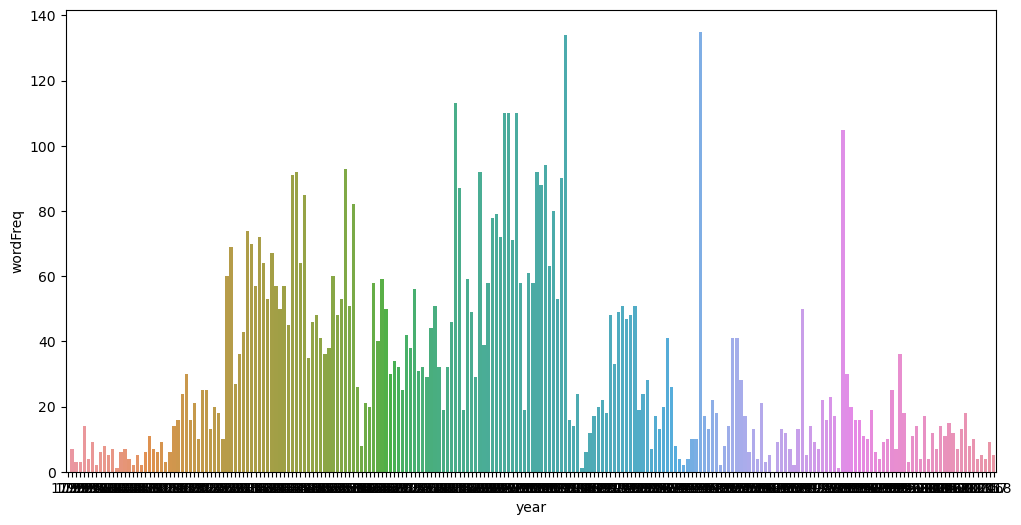

In [38]:
sns.barplot(data=sotudf, x="year", y="wordFreq")

The previous plot looks similar to the plot we made in the Strings and Files lesson which compared the length of each SOTU address. So, it seems not to be revealing the pattern we want it to reveal.

It is always a good idea in data science to consider the denominator. When should you use absolute values? When should you use percentages or proportions? And, for the latter, what is the correct denominator to choose? In this case, we will use our "freq_perMillion" column which is calculated using the total word (or token) count as our denominator.

<AxesSubplot:xlabel='year', ylabel='freq_perMillion'>

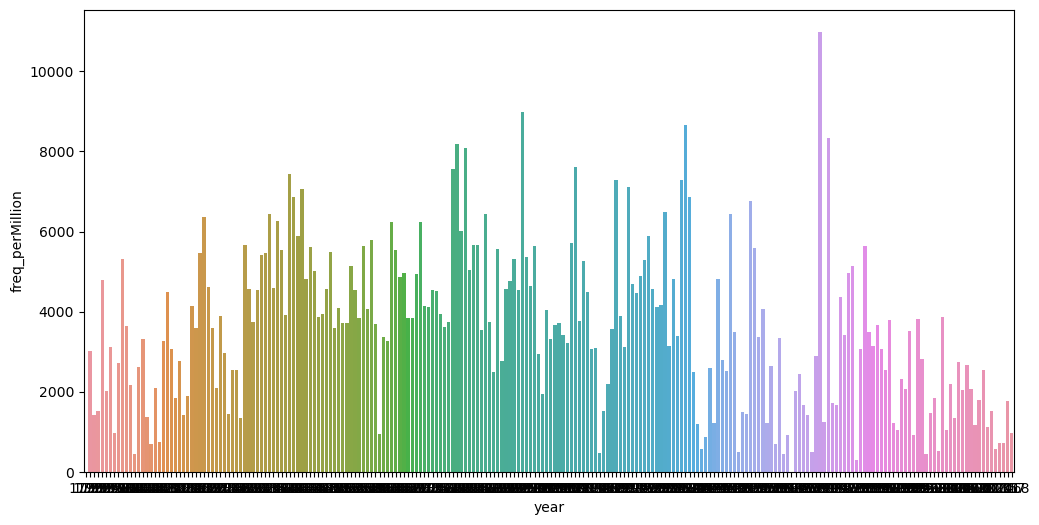

In [39]:
sns.barplot(data=sotudf, x="year", y="freq_perMillion")

## Part VI: Group and Plot Data by President

22. It would help to simplify this visualization. Following *The Atlantic*'s graphic, we can aggregate these results by President. Normally, we would just apply the **groupby** function to group this data by the president's name.

Unfortunately, when I first tried this, I realized that presidents with the same last name were being grouped together (think of the Adamses, Roosevelts, and Bushes). So, first we need to identify each unique president. To do this, we can use the **shift()** function to identify each time a new president's name appears in our chronologically-ordered dataframe. Thus, George H.W. Bush's administration (1989-1993) can be distinguished from his son's (2001-2009). *This works because, fortunately for our purposes, there has always been a gap between two presidents sharing the same name. If <s>Hunter</s>Ashley Biden is our next President then I will need to add first names to our dataset.*

In [40]:
sotudf["presnum"] = (sotudf["pres"] != sotudf["pres"].shift()).cumsum()
sotudf.head(20)

,pres,year,numtoks,tokens,fulltext,ltoks,wordFreq,freq_perMillion,presnum
0,Washington,1790,0,[],,[],0,NaN,1
1,Washington,1791,2314,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house...",7,3025.064823,1
2,Washington,1792,2104,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house...",3,1425.855513,1
3,Washington,1793,1973,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house...",3,1520.527116,1
4,Washington,1794,2918,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house...",14,4797.806717,1
5,Washington,1795,1988,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house...",4,2012.072435,1
6,Washington,1796,2878,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house...",9,3127.171647,1
7,Adams,1797,2060,"[Gentlemen, of, the, Senate, and, Gentlemen, o...",Gentlemen of the Senate and Gentlemen of the H...,"[gentlemen, of, the, senate, and, gentlemen, o...",2,970.873786,2
8,Adams,1798,2218,"[Gentlemen, of, the, Senate, and, Gentlemen, o...",Gentlemen of the Senate and Gentlemen of the H...,"[gentlemen, of, the, senate, and, gentlemen, o...",6,2705.139766,2
9,Adams,1799,1505,"[Gentlemen, of, the, Senate, and, Gentlemen, o...",Gentlemen of the Senate and Gentlemen of the H...,"[gentlemen, of, the, senate, and, gentlemen, o...",8,5315.614618,2


To explain the code above (sotudf["pres"] != sotudf['pres'].shift()) returns True only when the president in the previous row is different than that in the current row. The function .cumsum() then adds 1 to its running count each time the president changes (indicated by the True value returned by the previous section of code)

You can see the result in the 'presnum' column.

22b. Now, we are going to create a new dataframe ("sotudf2") by grouping together the data in "sotudf" by the "presnum" column (thus aggregating the data by President rather than just by year). The .agg() function then establishes which other columns we want to keep and how the data in those columns will be aggregated ("sum", "mean", "first" being common options). We will then have to re-calculate our proportional variable ("freq_PerMillion").

In [41]:
sotudf2 = sotudf.groupby(['presnum']).agg({'pres':'first','wordFreq':'sum','numtoks':'sum','year':'first'})
sotudf2['freq_perMillion'] = sotudf2['wordFreq'] / sotudf2['numtoks'] * 1000000
sotudf2.head(10)


,pres,wordFreq,numtoks,year,freq_perMillion
presnum,,,,,
1,Washington,40,14175,1790,2821.869489
2,Adams,21,7157,1797,2934.190303
3,Jefferson,34,20743,1801,1639.107169
4,Madison,62,21738,1809,2852.148312
5,Monroe,167,42512,1817,3928.302597
6,Adams,61,31405,1825,1942.365865
7,Jackson,436,85570,1829,5095.243660
8,Buren,256,45594,1837,5614.773874
9,Tyler,209,34192,1841,6112.540945


23. Okay, let's see what our graphic looks like:

Note: we have cleaned up the axis labels and added a title using the .set command in Seaborn

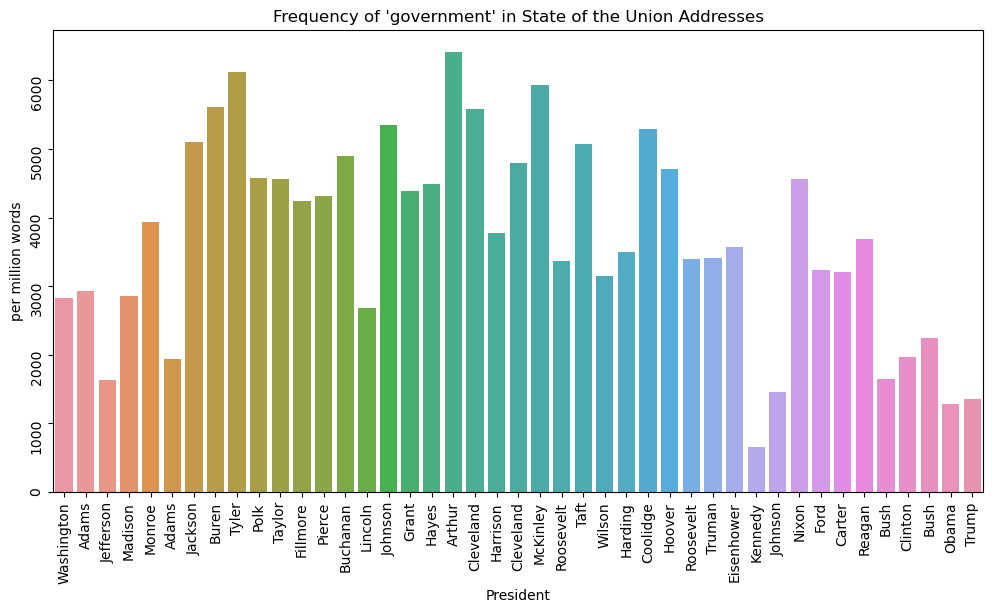

In [42]:
g=sns.barplot(data=sotudf2, x="year", y="freq_perMillion")
g.tick_params(labelrotation=90)
g.set(title = "Frequency of '%s' in State of the Union Addresses"%searchTerm)
g.set(ylabel='per million words', xlabel='President')
g.set(xticklabels = sotudf2.pres); #adding the ";" removes the annoying text that Python sometimes prints out with a graphic#

24. Below, I copied the code from **Step 14 - Step 23**, but this time placed into a function. *Note: all code within a function must be indented. Once the indentation ends, so does the function.* 

In [43]:
def sotuWordSearch2(ltoksCol,searchTerm): #returns a column of frequencies after searching for a term across a column of lower-case tokens
    #searchTerm = searchTerm.lower()
    wordFreq = ltoksCol.apply(lambda x:collections.Counter(x)[searchTerm])
    return(wordFreq)

def df_wordFreqCalc(old_df,searchTerm):   #reads in a dataframe of SOTU addresses by year and a searchTerm 
                                          ## returns a dataframe aggregated by President, with the 'wordFreq' and 'freq_perMillion' calculated for each president
                                          ## which is calculated using the sotuWordSearch2 function
    requiredCols = ['ltoks','numtoks','pres','presnum','year']
    if not set(requiredCols).issubset(old_df.columns):
        print("missing required column from:",requiredCols)
        return None
    old_df['wordFreq'] = sotuWordSearch2(old_df['ltoks'],searchTerm) 
    new_df = old_df.groupby(['pres','presnum']).agg({'wordFreq':'sum','numtoks':'sum','year':'first'})
    print(new_df.head(2))
    new_df['freq_perMillion'] = new_df['wordFreq'] / new_df['numtoks'] * 1000000
    new_df = new_df.sort_values(['year'])
    new_df = new_df.reset_index()
    print("searching for... :",searchTerm)
    return(new_df)
 
def createWordFreqPlot(df,searchTerm):            #reads in our aggregated SOTU dataframe and creates a bar plot of the search term
    #newdf = df_wordFreqCalc(df,searchTerm)
    requiredCols = ['freq_perMillion','pres','presnum']
    if not set(requiredCols).issubset(df.columns):
        print("missing required column from:",requiredCols)
        return None
    g=sns.barplot(data=df, x="presnum",y="freq_perMillion")
    g.tick_params(labelrotation=90)
    g.set(title = "Frequency of '%s' in State of the Union Addresses"%searchTerm)
    g.set(ylabel='per million words', xlabel='President')
    g.set(xticklabels = df.pres)
    return(g)

25. Now we can use the functions above to quickly choose a new search term, return a dataframe with the results of this search, and then create a plot.

In [44]:
searchTerm = "freedom"
sotudf3 = df_wordFreqCalc(sotudf,searchTerm)
print(sotudf3.head(15))

               wordFreq  numtoks  year
pres  presnum                         
Adams 2               0     7157  1797
      6              10    31405  1825
searching for... : freedom
          pres  presnum  wordFreq  numtoks  year  freq_perMillion
0   Washington        1         1    14175  1790        70.546737
1        Adams        2         0     7157  1797         0.000000
2    Jefferson        3         4    20743  1801       192.836137
3      Madison        4         3    21738  1809       138.007176
4       Monroe        5         4    42512  1817        94.091080
5        Adams        6        10    31405  1825       318.420634
6      Jackson        7         8    85570  1829        93.490709
7        Buren        8         3    45594  1837        65.798131
8        Tyler        9         4    34192  1841       116.986430
9         Polk       10         5    72643  1845        68.829756
10      Taylor       11         1     7666  1849       130.446126
11    Fillmore       12  

<AxesSubplot:title={'center':"Frequency of 'freedom' in State of the Union Addresses"}, xlabel='President', ylabel='per million words'>

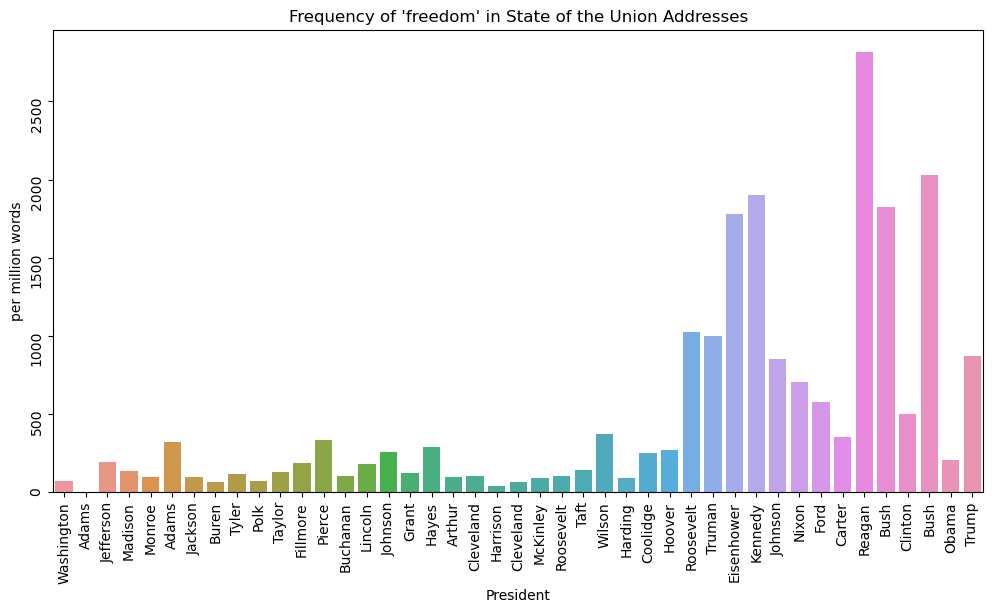

In [45]:
createWordFreqPlot(sotudf3,searchTerm)

26. What additions or changes would make this plot more useful, informative, or eye-catching?

<div class="alert alert-info" role="alert"><h3 style='color:blue'>Exercise (Part VI)</h3>
    <p>27. Explore the dataset by creating bar plots showing the frequency of other words of your choosing. (Hint: we made this really simple with the functions created in Step 24. Just re-use and modify the code we used in Step 25 to call these functions).

</div>

               wordFreq  numtoks  year
pres  presnum                         
Adams 2               0     7157  1797
      6               4    31405  1825
searching for... : children


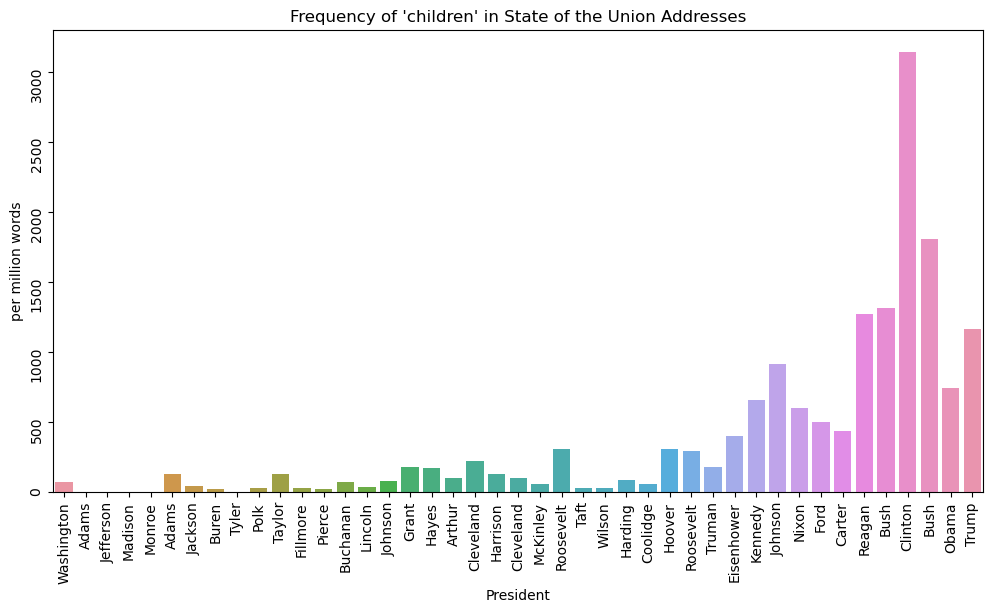

In [46]:
searchTerm = "children"
sotudf3 = df_wordFreqCalc(sotudf,searchTerm)
createWordFreqPlot(sotudf3,searchTerm);

## Part VII: NGrams

28. Often, in searching for patterns in texts, single words are not the most useful units of analysis. Instead, at times, the frequency of multiple-word terms may be more instructive. For example, historians mining historical scholarship may be interested in the rise and fall of sub-disciplines in his/her field, such as "social history", "cultural history", "environmental history", etc. In this case, the historian may want to examine patterns in two-word combinations, called **bigrams**. In other cases, it may be useful to examine three-, four-, or five-word combinations, called **ngrams**.

First, we will extract ngrams from a simple phrase:



In [47]:
text = "to be or not to be"
toks = nltk.word_tokenize(text) 
print(toks)

['to', 'be', 'or', 'not', 'to', 'be']


In [48]:
n = 2
n_grams=list(ngrams(toks,n))
print(n_grams)


[('to', 'be'), ('be', 'or'), ('or', 'not'), ('not', 'to'), ('to', 'be')]


29. Now let us create a list of ngrams from a SOTU address. We can retrieve a list of tokens from our sotudf dataframe. To do that, first we will need some practice filtering a dataframe. Observe what the following do and see [this link for more](https://www.geeksforgeeks.org/difference-between-loc-and-iloc-in-pandas-dataframe/):

In [49]:
sotudf.loc[sotudf['pres'] == "Adams"]

,pres,year,numtoks,tokens,fulltext,ltoks,wordFreq,freq_perMillion,presnum
7,Adams,1797,2060,"[Gentlemen, of, the, Senate, and, Gentlemen, o...",Gentlemen of the Senate and Gentlemen of the H...,"[gentlemen, of, the, senate, and, gentlemen, o...",0,970.873786,2
8,Adams,1798,2218,"[Gentlemen, of, the, Senate, and, Gentlemen, o...",Gentlemen of the Senate and Gentlemen of the H...,"[gentlemen, of, the, senate, and, gentlemen, o...",0,2705.139766,2
9,Adams,1799,1505,"[Gentlemen, of, the, Senate, and, Gentlemen, o...",Gentlemen of the Senate and Gentlemen of the H...,"[gentlemen, of, the, senate, and, gentlemen, o...",0,5315.614618,2
10,Adams,1800,1374,"[Gentlemen, of, the, Senate, and, Gentlemen, o...",Gentlemen of the Senate and Gentlemen of the H...,"[gentlemen, of, the, senate, and, gentlemen, o...",0,3639.010189,2
35,Adams,1825,9091,"[Fellow, Citizens, of, the, Senate, and, of, t...",Fellow Citizens of the Senate and of the House...,"[fellow, citizens, of, the, senate, and, of, t...",1,1429.985700,6
36,Adams,1826,7852,"[Fellow, Citizens, of, the, Senate, and, of, t...",Fellow Citizens of the Senate and of the House...,"[fellow, citizens, of, the, senate, and, of, t...",1,2547.121752,6
37,Adams,1827,7064,"[Fellow, Citizens, of, the, Senate, and, of, t...",Fellow Citizens of the Senate and of the House...,"[fellow, citizens, of, the, senate, and, of, t...",0,2548.131370,6
38,Adams,1828,7398,"[Fellow, Citizens, of, the, Senate, and, of, t...",Fellow Citizens of the Senate and of the House...,"[fellow, citizens, of, the, senate, and, of, t...",2,1351.716680,6


In [50]:
sotudf.loc[(sotudf['pres'] == "Adams") & (sotudf['year'] > "1820")]

,pres,year,numtoks,tokens,fulltext,ltoks,wordFreq,freq_perMillion,presnum
35,Adams,1825,9091,"[Fellow, Citizens, of, the, Senate, and, of, t...",Fellow Citizens of the Senate and of the House...,"[fellow, citizens, of, the, senate, and, of, t...",1,1429.985700,6
36,Adams,1826,7852,"[Fellow, Citizens, of, the, Senate, and, of, t...",Fellow Citizens of the Senate and of the House...,"[fellow, citizens, of, the, senate, and, of, t...",1,2547.121752,6
37,Adams,1827,7064,"[Fellow, Citizens, of, the, Senate, and, of, t...",Fellow Citizens of the Senate and of the House...,"[fellow, citizens, of, the, senate, and, of, t...",0,2548.131370,6
38,Adams,1828,7398,"[Fellow, Citizens, of, the, Senate, and, of, t...",Fellow Citizens of the Senate and of the House...,"[fellow, citizens, of, the, senate, and, of, t...",2,1351.716680,6


In [51]:
sotudf.dtypes  #here we can print out the data types of each column. 
                ##Notice, the "year" column is not considered a number (either an integer or a float). 
                ## Hence, in the code above and below we placed the year we are searching for in quotes.
                ## Meanwhile, "numtoks" is identified as an integer so we do not place our desired number in quotes (see 2 code cells below)

pres                object
year                object
numtoks              int64
tokens              object
fulltext            object
ltoks               object
wordFreq             int64
freq_perMillion    float64
presnum              int32
dtype: object

In [52]:
sotudf.loc[sotudf['year'] == "1849"]

,pres,year,numtoks,tokens,fulltext,ltoks,wordFreq,freq_perMillion,presnum
59,Taylor,1849,7666,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house...",1,4565.614401,11


In [53]:
sotudf.loc[(sotudf['numtoks'] > 25000)]

,pres,year,numtoks,tokens,fulltext,ltoks,wordFreq,freq_perMillion,presnum
115,Roosevelt,1905,25168,"[To, the, Senate, and, House, of, Representati...",To the Senate and House of Representatives:\n\...,"[to, the, senate, and, house, of, representati...",12,3655.435474,24
117,Roosevelt,1907,27584,"[To, the, Senate, and, House, of, Representati...",To the Senate and House of Representatives:\n\...,"[to, the, senate, and, house, of, representati...",9,3407.772622,24
122,Taft,1912,25411,"[PART, I, To, the, Senate, and, House, of, Rep...",PART I\n\nTo the Senate and House of Represent...,"[part, i, to, the, senate, and, house, of, rep...",2,5273.306836,25
155,Truman,1946,28099,"[To, the, Congress, of, the, United, States, A...",To the Congress of the United States:\n\nA qua...,"[to, the, congress, of, the, united, states, a...",2,4804.441439,31
190,Carter,1981,34177,"[To, the, Congress, of, the, United, States, T...",To the Congress of the United States:\n\nThe S...,"[to, the, congress, of, the, united, states, t...",15,3072.241566,37


In [54]:
sotudf.iloc[0:5]

,pres,year,numtoks,tokens,fulltext,ltoks,wordFreq,freq_perMillion,presnum
0,Washington,1790,0,[],,[],0,NaN,1
1,Washington,1791,2314,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house...",0,3025.064823,1
2,Washington,1792,2104,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house...",0,1425.855513,1
3,Washington,1793,1973,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house...",0,1520.527116,1
4,Washington,1794,2918,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house...",0,4797.806717,1


In [55]:
# pres = "Eisenhower"   ##not necessary to define since only one president gives an address in a given year!
year = "1956"
#the line below extracts the tokens for just one SOTU address (specified with the pres and year variables)
# toks = sotudf.loc[(sotudf['pres'] == pres) & (sotudf['year'] == year)]['tokens'].values[0]
toks = sotudf.loc[sotudf['year'] == year]['tokens'].values[0]
print(toks[:50])

['To', 'the', 'Congress', 'of', 'the', 'United', 'States', 'The', 'opening', 'of', 'this', 'new', 'year', 'must', 'arouse', 'in', 'us', 'all', 'grateful', 'thanks', 'to', 'a', 'kind', 'Providence', 'whose', 'protection', 'has', 'been', 'ever', 'present', 'and', 'whose', 'bounty', 'has', 'been', 'manifold', 'and', 'abundant', 'The', 'State', 'of', 'the', 'Union', 'today', 'demonstrates', 'what', 'can', 'be', 'accomplished', 'under']


29b. Now, from the list of toks we extracted from the 1956 address, we are going to create a new list of lower-cased tokens, convert both token lists into ngrams (of length 3), create a frequency list of each list, and then output the most common 10 ngrams in each. Notice, the slight difference in the lower-case and regular-case results. Which method is preferable?

In [56]:
ltoks = [tok.lower() for tok in toks]
n = 3                                  #n sets the number of words in phrase we will search for; experiment by adjusting this number n
n_gramslower = list(ngrams(ltoks,n))
n_grams = list(ngrams(toks,n))
ng_freqslower = collections.Counter(n_gramslower)
ng_freqs = collections.Counter(n_grams)
print(ng_freqslower.most_common(10),"\n\n***\n")
print(ng_freqs.most_common(10))

[(('to', 'the', 'congress'), 11), (('the', 'united', 'states'), 9), (('of', 'the', 'united'), 7), (('of', 'our', 'people'), 6), (('will', 'be', 'submitted'), 6), (('submitted', 'to', 'the'), 6), (('the', 'administration', 'will'), 6), (('past', 'three', 'years'), 5), (('be', 'submitted', 'to'), 5), (('the', 'free', 'world'), 5)] 

***

[(('to', 'the', 'Congress'), 10), (('the', 'United', 'States'), 8), (('of', 'the', 'United'), 7), (('of', 'our', 'people'), 6), (('will', 'be', 'submitted'), 6), (('submitted', 'to', 'the'), 6), (('past', 'three', 'years'), 5), (('be', 'submitted', 'to'), 5), (('the', 'free', 'world'), 5), (('The', 'Administration', 'will'), 5)]


**30. With more time, we could apply the same analysis we did with individual word frequencies to analyze the frequency of ngrams of various lengths.**

Ngrams analysis, however, sometimes poses other questions. 

For example, do we want to keep stopwords? Describing a person, as "the leader" rather than "a leader" makes a significant difference. 

Also, would we want to keep capitalized words? Obviously, "united nations" could mean something different than "United Nations."

<div class="alert alert-info" role="alert"><h3 style = "color:blue">Exercise (Part VII)</h3>

<p style = "color:blue">Create a ngram frequency list for another SOTU address. Try different length ngrams.</p></div>

In [57]:
year = "1973"
ltoks = sotudf.loc[sotudf['year'] == year]['ltoks'].values[0]
n = 4                                 #n sets the number of words in phrase we will search for; experiment by adjusting this number n
n_gramslower = list(ngrams(ltoks,n))
ng_freqslower = collections.Counter(n_gramslower)
print(ng_freqslower.most_common(50))

[(('state', 'of', 'the', 'union'), 5), (('the', 'time', 'has', 'come'), 3), (('in', 'the', 'form', 'of'), 2), (('of', 'mutual', 'respect', 'and'), 2), (('i', 'believe', 'that', 'we'), 2), (('believe', 'that', 'we', 'can'), 2), (('in', 'the', 'field', 'of'), 2), (('time', 'has', 'come', 'for'), 2), (('to', 'the', 'congress', 'of'), 1), (('the', 'congress', 'of', 'the'), 1), (('congress', 'of', 'the', 'united'), 1), (('of', 'the', 'united', 'states'), 1), (('the', 'united', 'states', 'the'), 1), (('united', 'states', 'the', 'traditional'), 1), (('states', 'the', 'traditional', 'form'), 1), (('the', 'traditional', 'form', 'of'), 1), (('traditional', 'form', 'of', 'the'), 1), (('form', 'of', 'the', 'president'), 1), (('of', 'the', 'president', 's'), 1), (('the', 'president', 's', 'annual'), 1), (('president', 's', 'annual', 'report'), 1), (('s', 'annual', 'report', 'giving'), 1), (('annual', 'report', 'giving', 'to'), 1), (('report', 'giving', 'to', 'the'), 1), (('giving', 'to', 'the', 'co

## Part VIII: Visualizing Word Patterns - Comparing Multiple Words

### Dispersion Plots, Frequency Graphs, etc.

31. Another way to visualize changing word frequencies over time is through a dispersion plot. One way to create a dispersion plot is to work with a master text that contains all SOTU texts arranged in chronological order. We can access such a "master text" in the "allSotus.txt" file.

In [58]:
tokenizer = RegexpTokenizer(r'\w+')
with open("allSotus.txt",encoding='utf-8') as f:
    allSotus = f.read()
print(len(allSotus))

#fdist = Counter(nltk.word_tokenize(allSotus))
#tokens = word_tokenize(allSotus) #this takes a long time
alltoks=tokenizer.tokenize(allSotus)
print(len(alltoks))
print(sotudf['numtoks'].sum())  #this sums up all the numtoks values for each address in our sotudf to see if the total equals that from our master text ("allSotus")
txt = nltk.Text(alltoks)



10604117
1786621
1786621


1786621


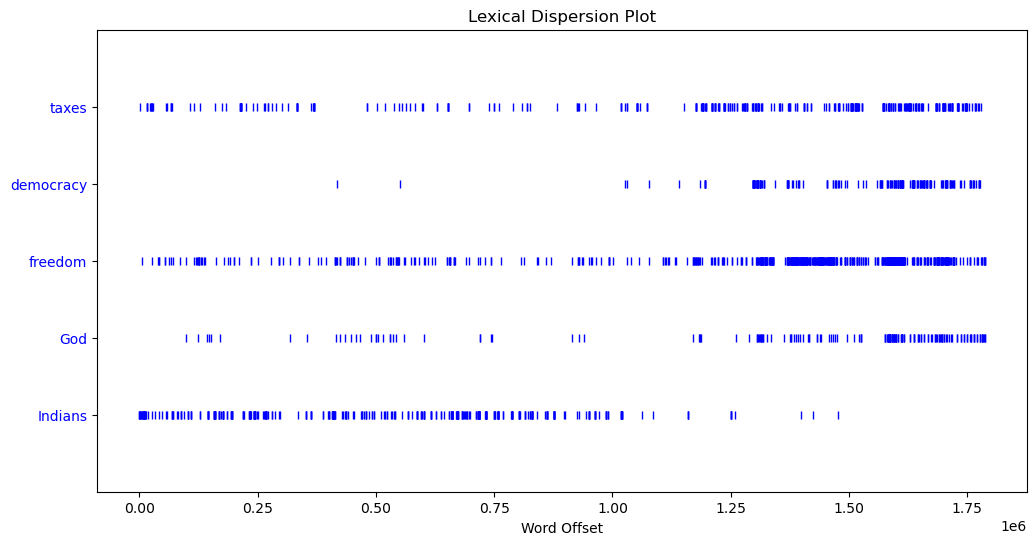

In [59]:
print(len(alltoks))
txt.dispersion_plot(["taxes", "democracy", "freedom", "God", "Indians"])   #the dispersion_plot function is from the nltk library

## Appendix 1: Creating a Graph of the Lexical Diversity of SOTU texts.

### Lexical Diversity



We can quantify the diversity and complexity of a text's vocabulary by calculating its **lexical diversity**. This is calculated simply by dividing the total number of words found in a text by the number of unique words. A text with high lexical diversity has a high percentage of unique words, whereas a text with low lexical diversity repeats the same words frequently.

In [60]:
#we will use ltokens2, which you may recall excludes punctuation but not stopwords
print("# of words = ",len(ltokens2))  #here we are using ltokens2, because we want to keep the stopwords as part of our count
print("# of unique words = ",len(set(ltokens2)))
lexdiv=len(ltokens2)/len(set(ltokens2))
print(lexdiv)

# of words =  2918
# of unique words =  1093
2.6697163769441903


*We will come back to this. For example, after learning how to iterate through a corpus of texts, we will compare the lexical diversity of the SOTU texts to examine how it has changed over time and from president to president.*

In [61]:
start = time.time()
#sotudf['numUniq'] = len(set(sotudf['tokens']))
sotudf['numUniq'] = sotudf['tokens'].apply(lambda x:len(set(x)))
#sotudf['lexdiv'] = sotudf[ 'numtoks']/sotudf['numUniq']
def doDiv (numer,denom):
    if numer>0:
        ans = numer/denom
    else:
        ans = 0
    return(ans)
sotudf['lexdiv'] = sotudf.apply(lambda x: doDiv(x.numUniq,x.numtoks), axis = 1)
print(time.time() - start)
sotudf.head(20)

0.10707592964172363


,pres,year,numtoks,tokens,fulltext,ltoks,wordFreq,freq_perMillion,presnum,numUniq,lexdiv
0,Washington,1790,0,[],,[],0,NaN,1,0,0.000000
1,Washington,1791,2314,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house...",0,3025.064823,1,811,0.350475
2,Washington,1792,2104,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house...",0,1425.855513,1,764,0.363118
3,Washington,1793,1973,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house...",0,1520.527116,1,798,0.404460
4,Washington,1794,2918,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house...",0,4797.806717,1,1133,0.388280
5,Washington,1795,1988,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house...",1,2012.072435,1,814,0.409457
6,Washington,1796,2878,"[Fellow, Citizens, of, the, Senate, and, House...",Fellow-Citizens of the Senate and House of Rep...,"[fellow, citizens, of, the, senate, and, house...",0,3127.171647,1,998,0.346769
7,Adams,1797,2060,"[Gentlemen, of, the, Senate, and, Gentlemen, o...",Gentlemen of the Senate and Gentlemen of the H...,"[gentlemen, of, the, senate, and, gentlemen, o...",0,970.873786,2,727,0.352913
8,Adams,1798,2218,"[Gentlemen, of, the, Senate, and, Gentlemen, o...",Gentlemen of the Senate and Gentlemen of the H...,"[gentlemen, of, the, senate, and, gentlemen, o...",0,2705.139766,2,827,0.372858
9,Adams,1799,1505,"[Gentlemen, of, the, Senate, and, Gentlemen, o...",Gentlemen of the Senate and Gentlemen of the H...,"[gentlemen, of, the, senate, and, gentlemen, o...",0,5315.614618,2,593,0.394020


[Text(0, 0.5, 'Unique Words as Percent of Total Words'), Text(0.5, 0, 'Year')]

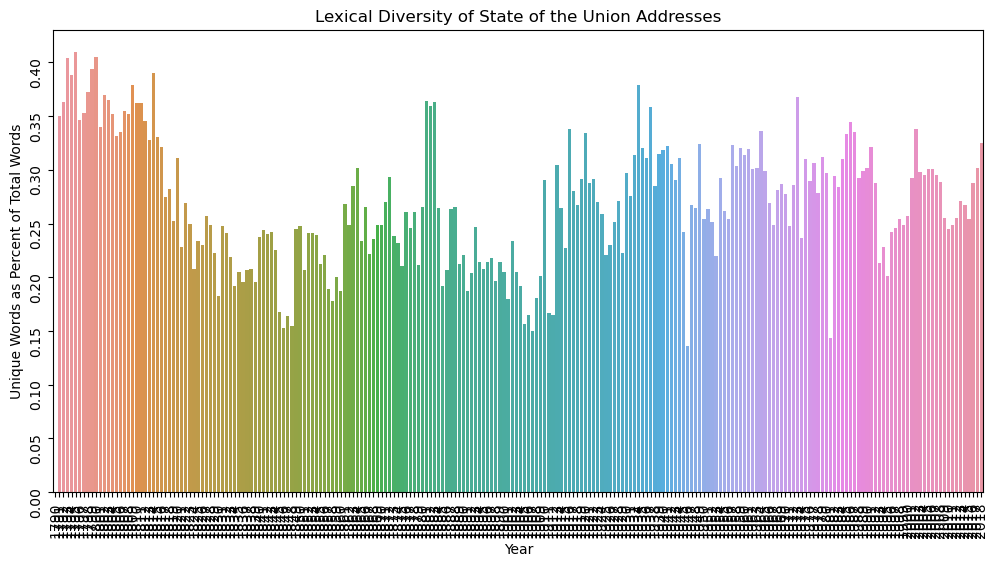

In [62]:
g=sns.barplot(data=sotudf, x="year",y="lexdiv")
g.tick_params(labelrotation=90)
g.set(title = "Lexical Diversity of State of the Union Addresses")
g.set(ylabel='Unique Words as Percent of Total Words', xlabel='Year')
#g.set(xticklabels = sotudf.pres);